In [1]:
import numpy as np
import torch
import scipy.sparse as sp
import pandas as pd
import math
import random
from sklearn.preprocessing import minmax_scale, scale
import matplotlib.pyplot as plt
from sklearn import metrics
from itertools import cycle

/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = np.load('./ROC_plot1.npy', allow_pickle=True).item()

In [3]:
names = list(data.keys())
names

['peryton_sign2',
 'peryton_sign3',
 'greet_embedding_peryton',
 'trustsgcn_embedding_peryton',
 'gatmda_embedding_peryton',
 'slgnn_embedding_peryton']

In [4]:
names_1 = ['sign2', 'sign1', 'greet', 'trustsgcn', 'gatmda', 'slgnn']


In [15]:
# roc_plot1 = {item:data[item] for item in names[3:]}
# roc_plot2 = {item:data[item] for item in names[:3]}
# roc_plot1.update(roc_plot2)
# roc_plot1.keys()
# np.save('./ROC_plot.npy', roc_plot1)


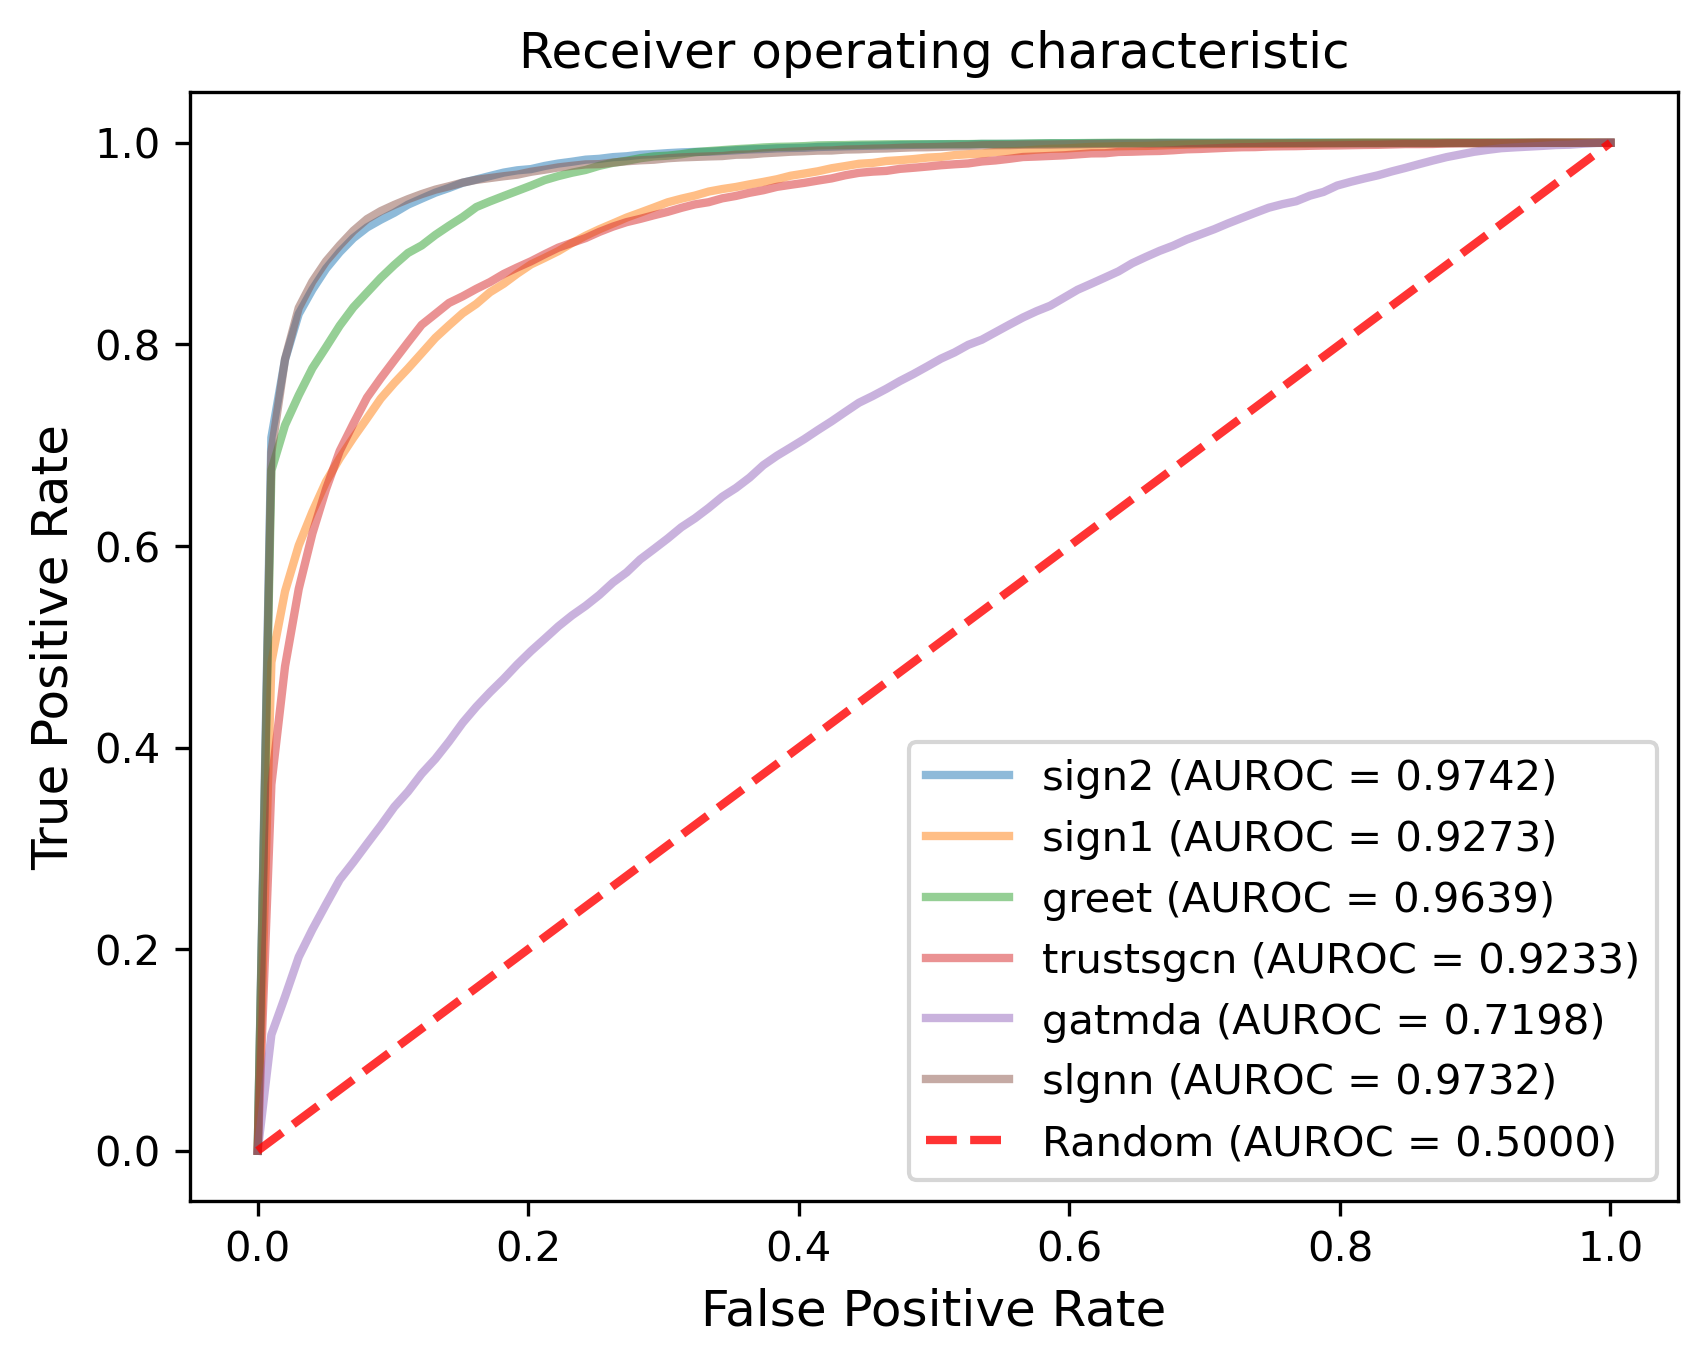

In [5]:
c = cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',  # 使用颜色编码定义颜色
            '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#001e36'])
fig, ax = plt.subplots(dpi=300) # 指定大小分辨率等，相当于画纸
for i, (item, color) in enumerate(zip(names, c)):
    ax.plot(data[item][0], data[item][1], color=color, lw=2, alpha=.5,
            label=str(names_1[i]) + ' (AUROC = %0.4f)' % data[item][2])
    
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random (AUROC = {:.4f})'.format(0.5), alpha=.8)
ax.set_xlabel('False Positive Rate', size=12)
ax.set_ylabel('True Positive Rate', size=12)
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.savefig('./ROC.tiff', dpi=300)

In [25]:
plt.savefig('./roc.tiff')

<Figure size 640x480 with 0 Axes>

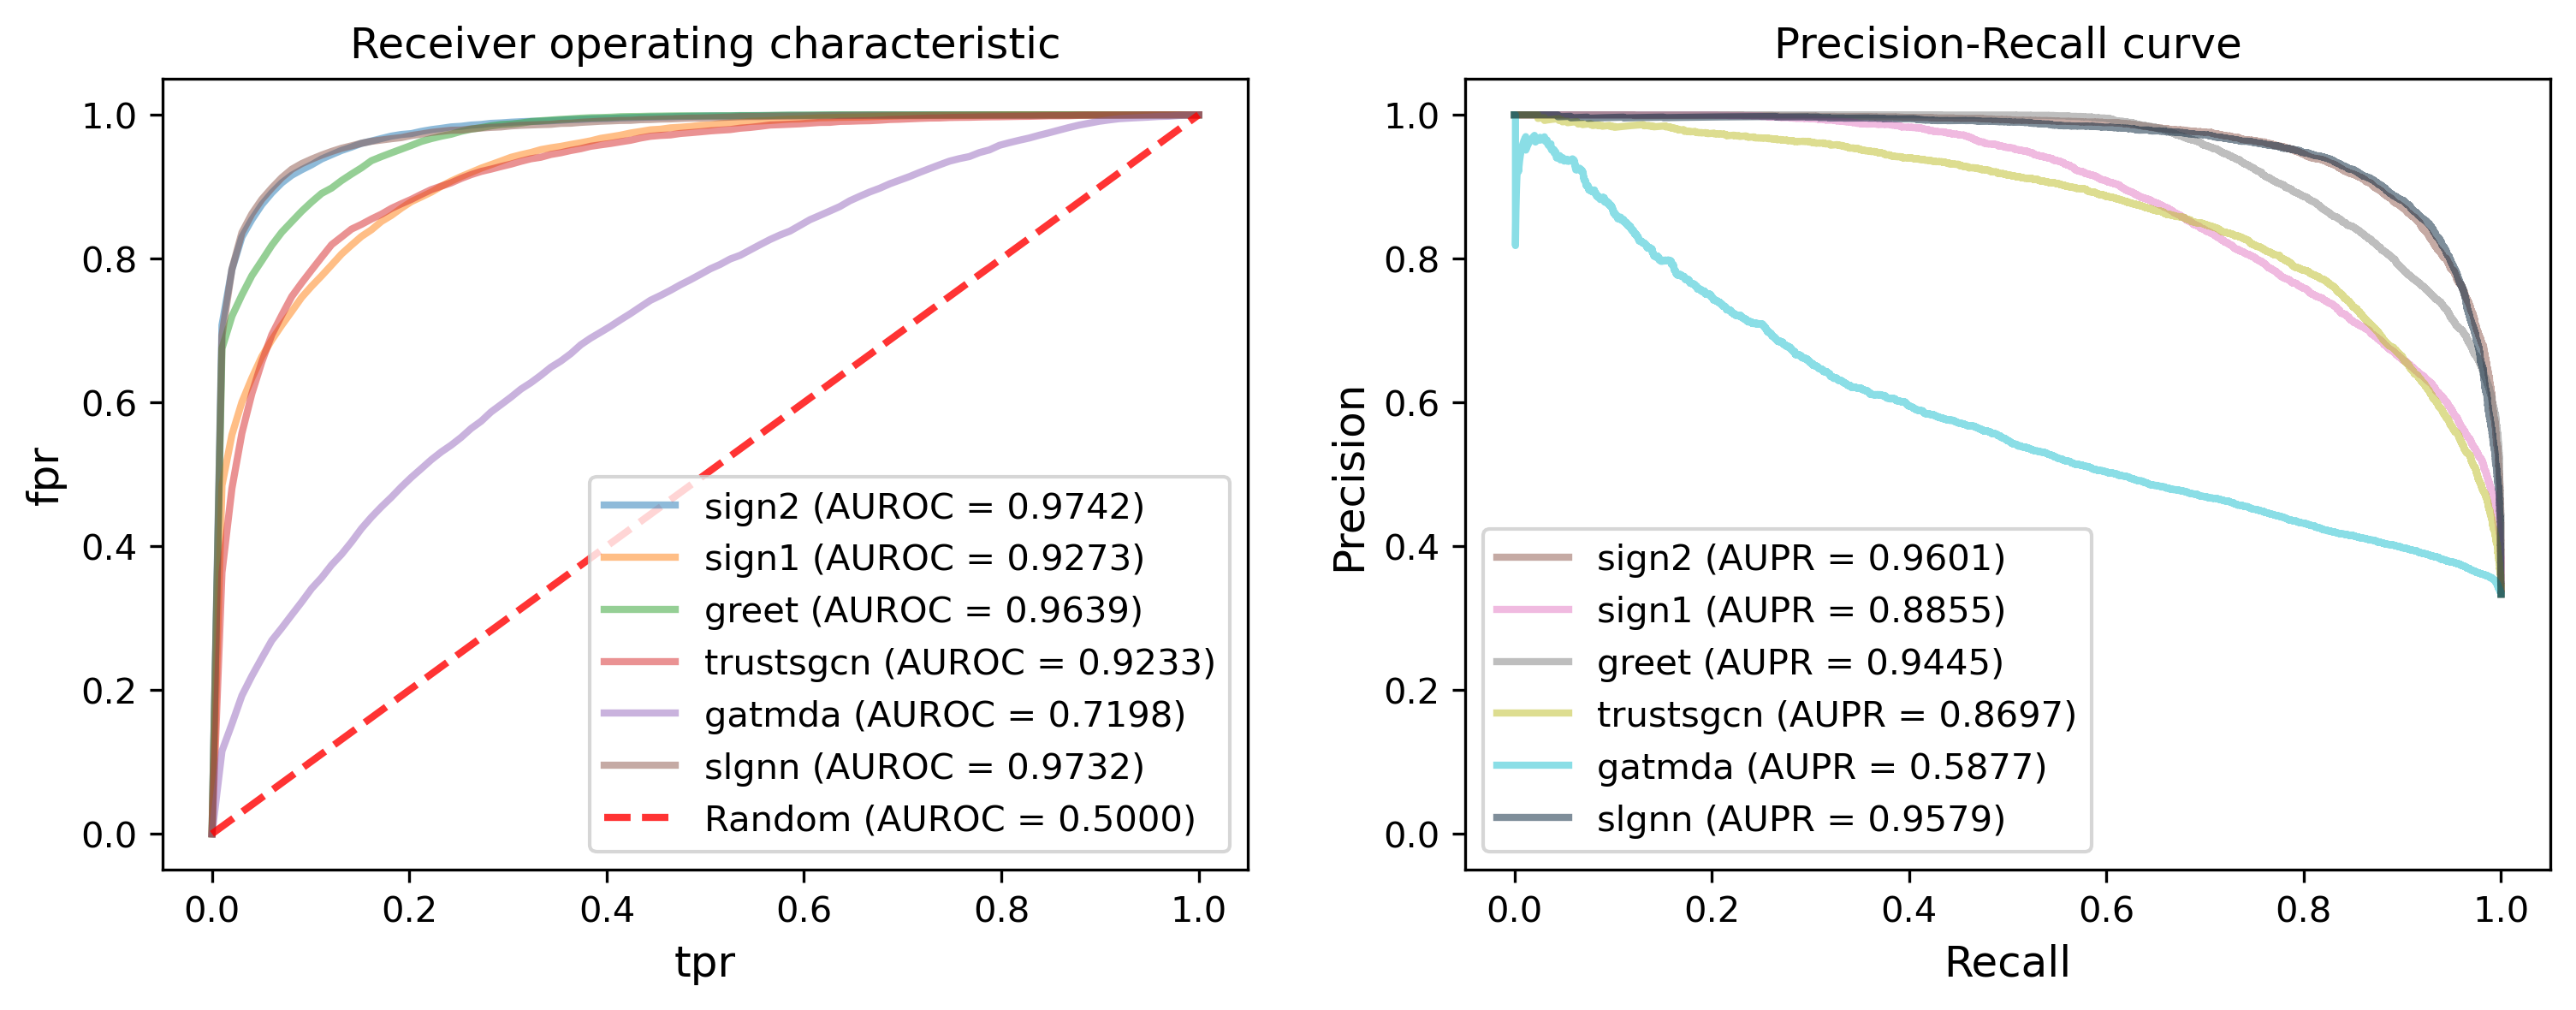

In [18]:
data = np.load('./ROC_plot1.npy', allow_pickle=True).item()
names = list(data.keys())
names_1 = ['MSignVGAE', 'MVGAEW', 'GREET', 'TrustSGCN', 'GATMDA', 'SLGNN']
c = cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',  # 使用颜色编码定义颜色
            '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#001e36'])
fig, ax = plt.subplots(nrows=1, ncols=2,dpi=300, figsize=(12, 4)) # 指定大小分辨率等，相当于画纸
for i, (item, color) in enumerate(zip(names, c)):
    ax[0].plot(data[item][0], data[item][1], color=color, lw=2, alpha=.5,
            label=str(names_1[i]) + ' (AUROC = %0.4f)' % data[item][2])
    
ax[0].plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random (AUROC = {:.4f})'.format(0.5), alpha=.8)
ax[0].set_xlabel('tpr', size=12)
ax[0].set_ylabel('fpr', size=12)
ax[0].set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax[0].legend(loc="lower right")

data = np.load('../PR/PR_plot.npy', allow_pickle=True).item()
names = list(data.keys())
# names_1 = ['sign2', 'sign1', 'greet', 'trustsgcn', 'gatmda', 'slgnn']
c = cycle([ # 使用颜色编码定义颜色
            '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#001e36'])
for i, (item, color) in enumerate(zip(names, c)):
    ax[1].plot(data[item][0], data[item][1], color=color, lw=2, alpha=.5,
            label=str(names_1[i]) + ' (AUPR = %0.4f)' % data[item][2])
    
ax[1].set_xlabel('Recall', size=12)
ax[1].set_ylabel('Precision', size=12)
ax[1].set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
    title="Precision-Recall curve")
ax[1].legend(loc="lower left")